In [195]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [196]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c0544f5f-b56c-6165-e2ac-aba382494dc9)
GPU 1: Tesla T4 (UUID: GPU-f04bf758-6471-e425-c27d-e6ad2d7ca629)


In [197]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-whitegrid")

/tmp/ipykernel_34/1948985775.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [198]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [199]:
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


Total no of disaster tweets:  4342
Percent of disaster tweets:  57.03%


Total no of non-disaster tweets:  3271
Percent of non-disaster tweets:  42.97%


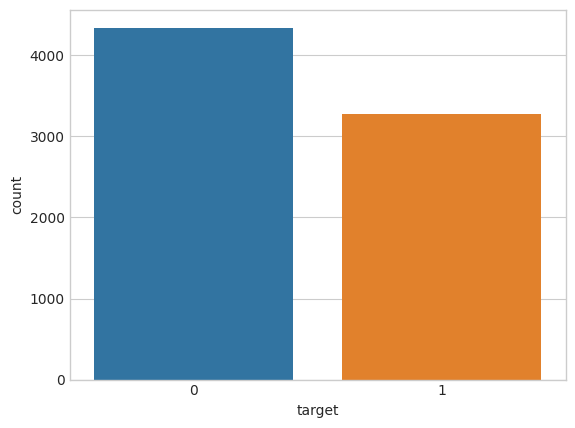

In [200]:
sns.countplot(train_df, x="target")
cnt = train_df['target'].value_counts()
print("Total no of disaster tweets: ",cnt[0])
print("Percent of disaster tweets: ",f'{cnt[0]/len(train_df)*100:.2f}%')
print("\n")
print("Total no of non-disaster tweets: ",cnt[1])
print("Percent of non-disaster tweets: ",f'{cnt[1]/len(train_df)*100:.2f}%')

In [201]:
import random
start_range = 0
end_range = len(train_df)
random_list = list(random.sample(range(start_range, end_range + 1), 6))
for i in random_list:
    row = train_df.iloc[i]
    print("Label ", row['target'], "(real disaster)" if row['target'] == 1 else "(not real disaster)")
    print("Text \n",row['text'])
    print("--"*21,'\n')
    

Label  1 (real disaster)
Text 
 @XHNews We need these plants in the pacific during the cyclone seasons it would help
------------------------------------------ 

Label  0 (not real disaster)
Text 
 National free root beer float day is tomorrow at A&amp;W from 2pm-close!! Help support the Wounded Warrior Project with donations!! :)
------------------------------------------ 

Label  0 (not real disaster)
Text 
 Posted a new song: 'Earthquake' http://t.co/RfTyyZ4GwJ http://t.co/lau0Ay7ahV
------------------------------------------ 

Label  0 (not real disaster)
Text 
 @ENews Ben Affleck......I know there's a wife/kids and other girls but I can't help it. I've loved him since Armageddon #eonlinechat
------------------------------------------ 

Label  0 (not real disaster)
Text 
 Truth...
https://t.co/h6amECX5K7
#News
#BBC
#CNN
#Islam
#Truth
#god
#ISIS
#terrorism
#Quran
#Lies http://t.co/B8iWRdxcm0
------------------------------------------ 

Label  0 (not real disaster)
Text 
 I got evacu

In [202]:
train_df.iloc[1]

id                                               4
keyword                                        NaN
location                                       NaN
text        Forest fire near La Ronge Sask. Canada
target                                           1
Name: 1, dtype: object

#### Number of characters present in each tweet

<Axes: >

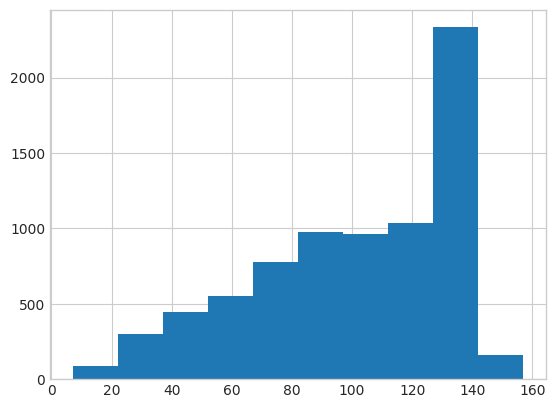

In [203]:
train_df['text'].str.len().hist()

In [204]:
train_df['char_len'] = train_df['text'].apply(len)

In [205]:
train_df

,id,keyword,location,text,target,char_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


Text(0.5, 1.0, 'Disaster tweets')

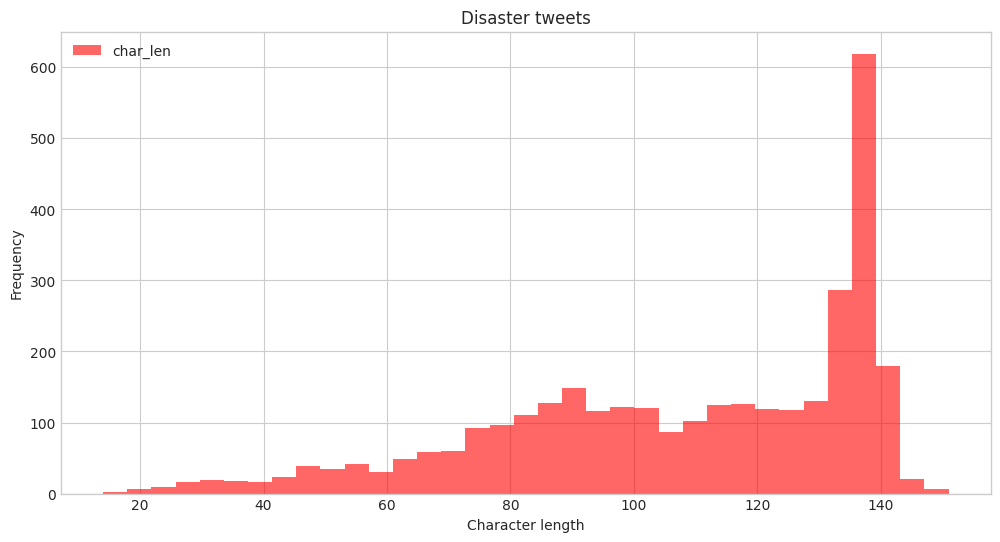

In [206]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==1]['char_len'].plot(bins=35, kind='hist', color='red',alpha=0.6)
plt.legend()
plt.xlabel("Character length")
plt.title("Disaster tweets")

Text(0.5, 1.0, 'Non Disaster tweets')

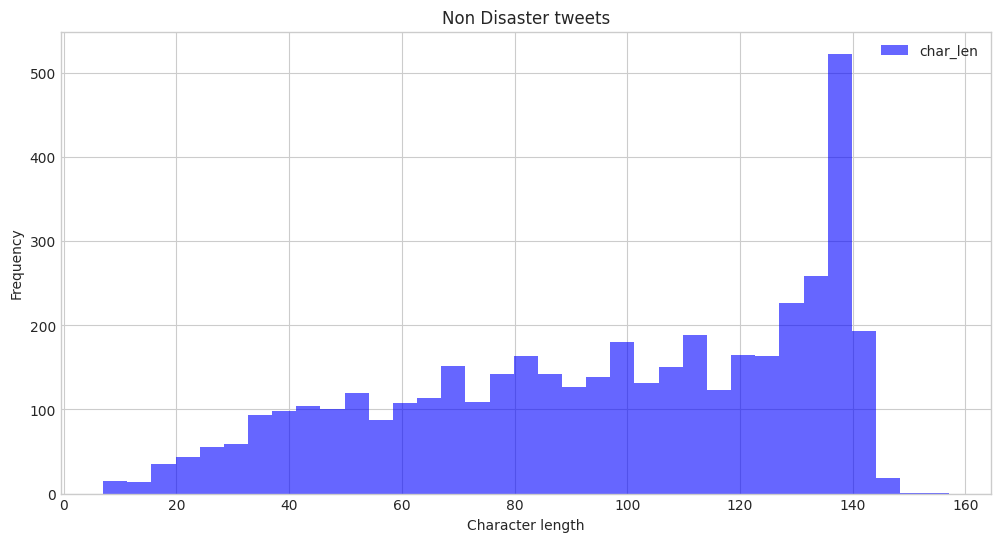

In [207]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==0]['char_len'].plot(bins=35, kind='hist', color='blue',alpha=0.6)
plt.legend()
plt.xlabel("Character length")
plt.title("Non Disaster tweets")

#### Number of words present in each tweet

In [208]:
train_df['word_len'] = train_df['text'].str.split().map(lambda x: len(x))

<Axes: >

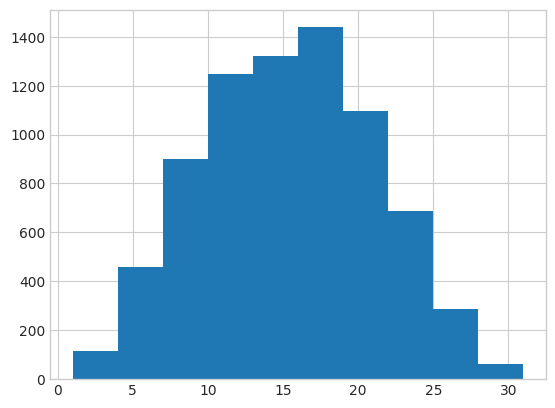

In [209]:
train_df['text'].str.split().map(lambda x: len(x)).hist()

Text(0.5, 1.0, 'Disaster tweets')

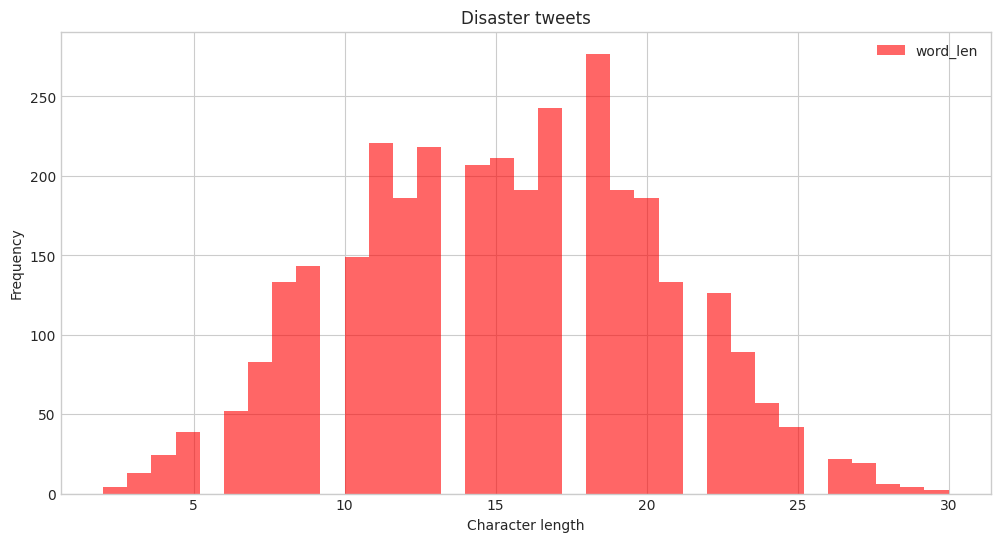

In [210]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==1]['word_len'].plot(bins=35, kind='hist', color='red',alpha=0.6)
plt.legend()
plt.xlabel("Character length")
plt.title("Disaster tweets")

Text(0.5, 1.0, 'Non Disaster tweets')

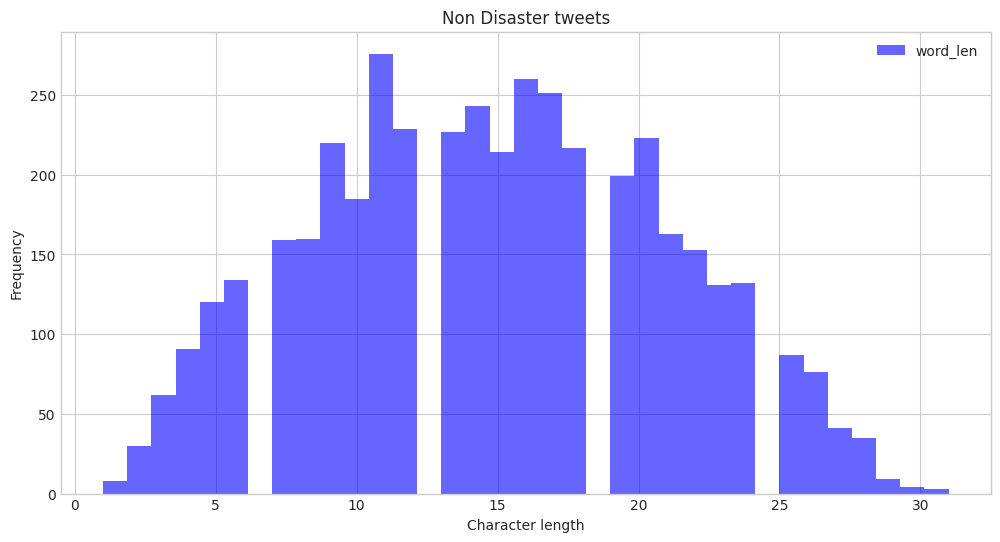

In [211]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==0]['word_len'].plot(bins=35, kind='hist', color='blue',alpha=0.6)
plt.legend()
plt.xlabel("Character length")
plt.title("Non Disaster tweets")

#### Descriptive Statistics

In [212]:
print("Disaster tweets \n")
train_df[['char_len', 'word_len']][train_df.target==1].describe().T

Disaster tweets 



,count,mean,std,min,25%,50%,75%,max
char_len,3271.0,108.113421,29.309854,14.0,88.0,115.0,136.0,151.0
word_len,3271.0,15.167533,5.096806,2.0,11.0,15.0,19.0,30.0


In [213]:
print("Non Disaster tweets \n")
train_df[['char_len', 'word_len']][train_df.target==0].describe().T

Non Disaster tweets 



,count,mean,std,min,25%,50%,75%,max
char_len,4342.0,95.706817,35.885924,7.0,68.0,101.0,130.0,157.0
word_len,4342.0,14.704744,6.161564,1.0,10.0,15.0,19.0,31.0


In [214]:
train_df['contains_link'] = train_df['text'].str.contains("https")
contains_link = train_df[(train_df["contains_link"] == True)]['target'].value_counts()
print("Disaster tweets that contains a link in the text body ", contains_link[1],'\n')
print("Non Disaster tweets that contains a link in the text body ", contains_link[0],'\n')

Disaster tweets that contains a link in the text body  134 

Non Disaster tweets that contains a link in the text body  273 



#### Stop words

In [215]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [234]:
corpus=[]
text = train_df['text'].str.split()
text = text.values.tolist()
corpus=[word for i in text for word in i]

from collections import defaultdict
dic=defaultdict(int)
non_dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
    if word not in stop:
        non_dic[word]+=1

In [235]:
stop_words_cnt = pd.DataFrame(list(dic.items()), columns=['word', 'count'])
nonstop_words_cnt = pd.DataFrame(list(non_dic.items()), columns=['word', 'count'])

In [244]:
def plotwords(df,cnt=15):
    df = df.sort_values(by='count', ascending=False)[:cnt]
    plt.figure(figsize=(18, 6))
    sns.barplot(x='word', y='count', data=df)
    # Add labels to the bars
    ax = plt.gca()
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')

    # Customize plot
    plt.xlabel('Word', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show plot
    plt.tight_layout()
    plt.show()

#### Top 15 stop words

Top 15 stop words 



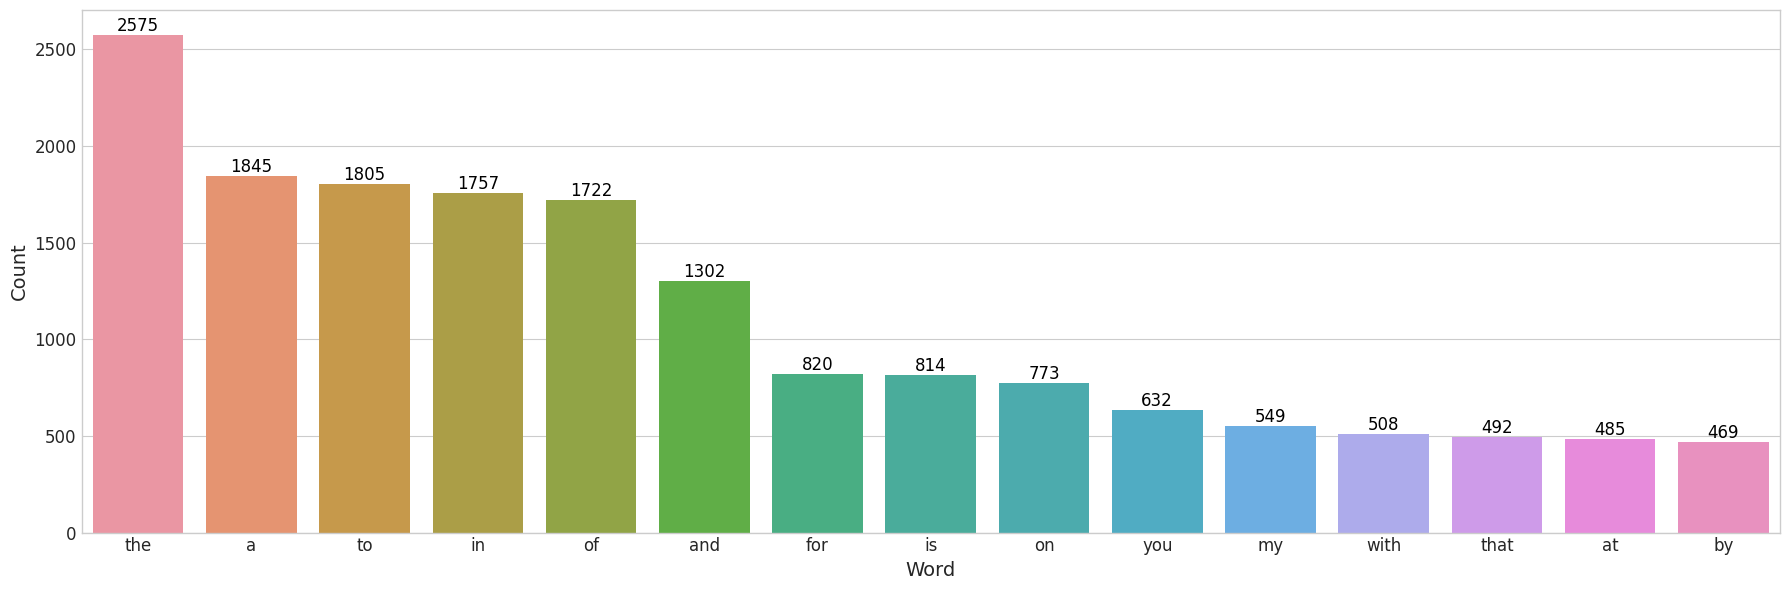

In [247]:
plotwords(stop_words_cnt)

#### Top 15 non-stop words

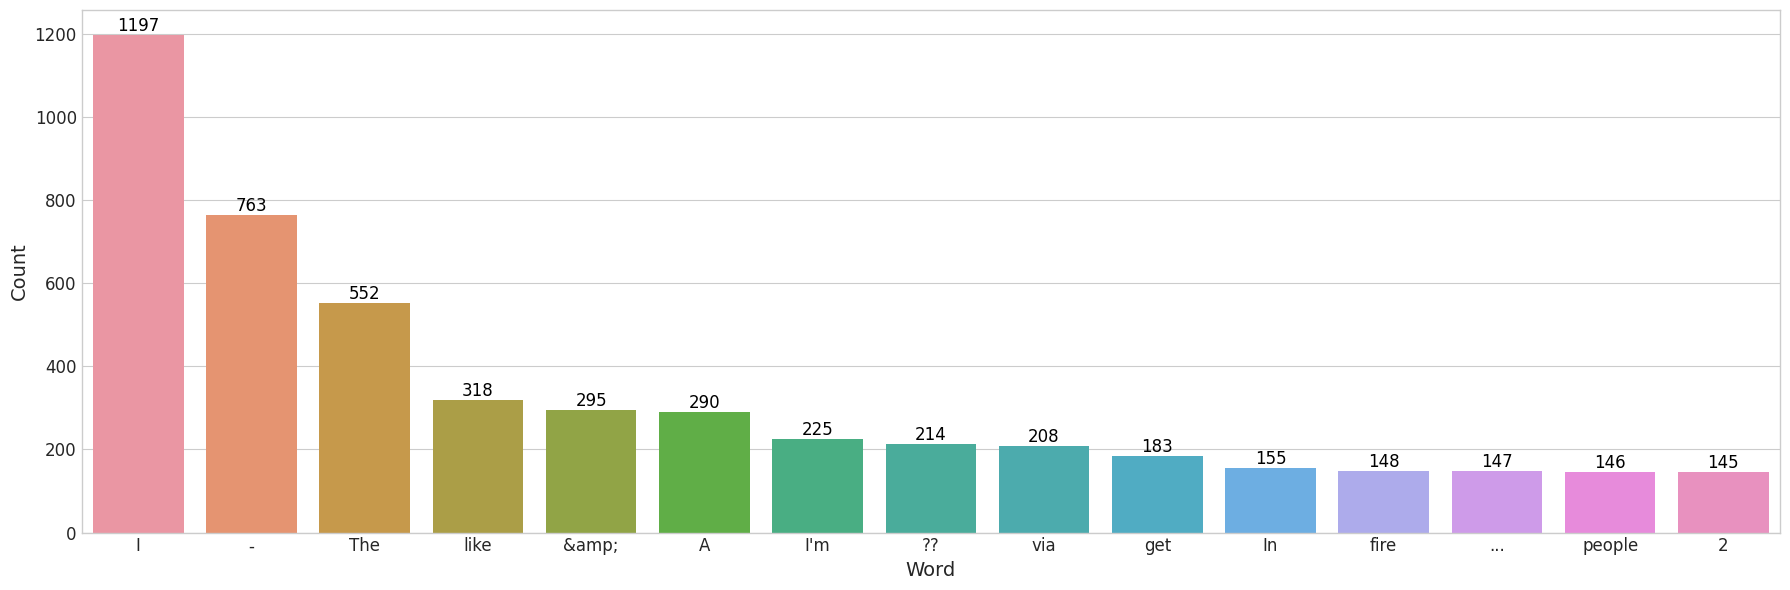

In [248]:
plotwords(nonstop_words_cnt)